In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import matplotlib.pyplot as plt

# Get Data

Load the dataset

In [2]:
data_path = "retail_store_inventory.csv"
df = pd.read_csv(data_path)

This dataset is named "retail_store_inventory" and was found on Kaggle. I chose the data set last week, looking for a high usability score.

# Explore the dataset

First 5 rows of the dataset:

In [3]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


Dataset Info:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

Basic statistics of the dataset:

In [5]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


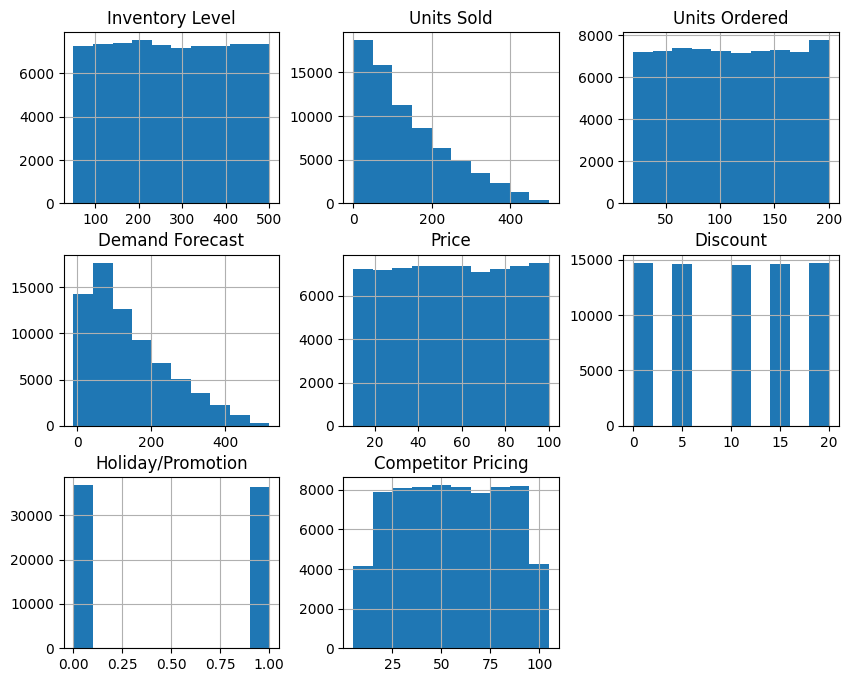

In [6]:
df.hist(figsize=(10,8))
plt.show()

# Setting Aside a Test Set

In [7]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (58480, 15)
Test set shape: (14620, 15)


# Exploring The Data

Visualize distributions of numerical features in the training set

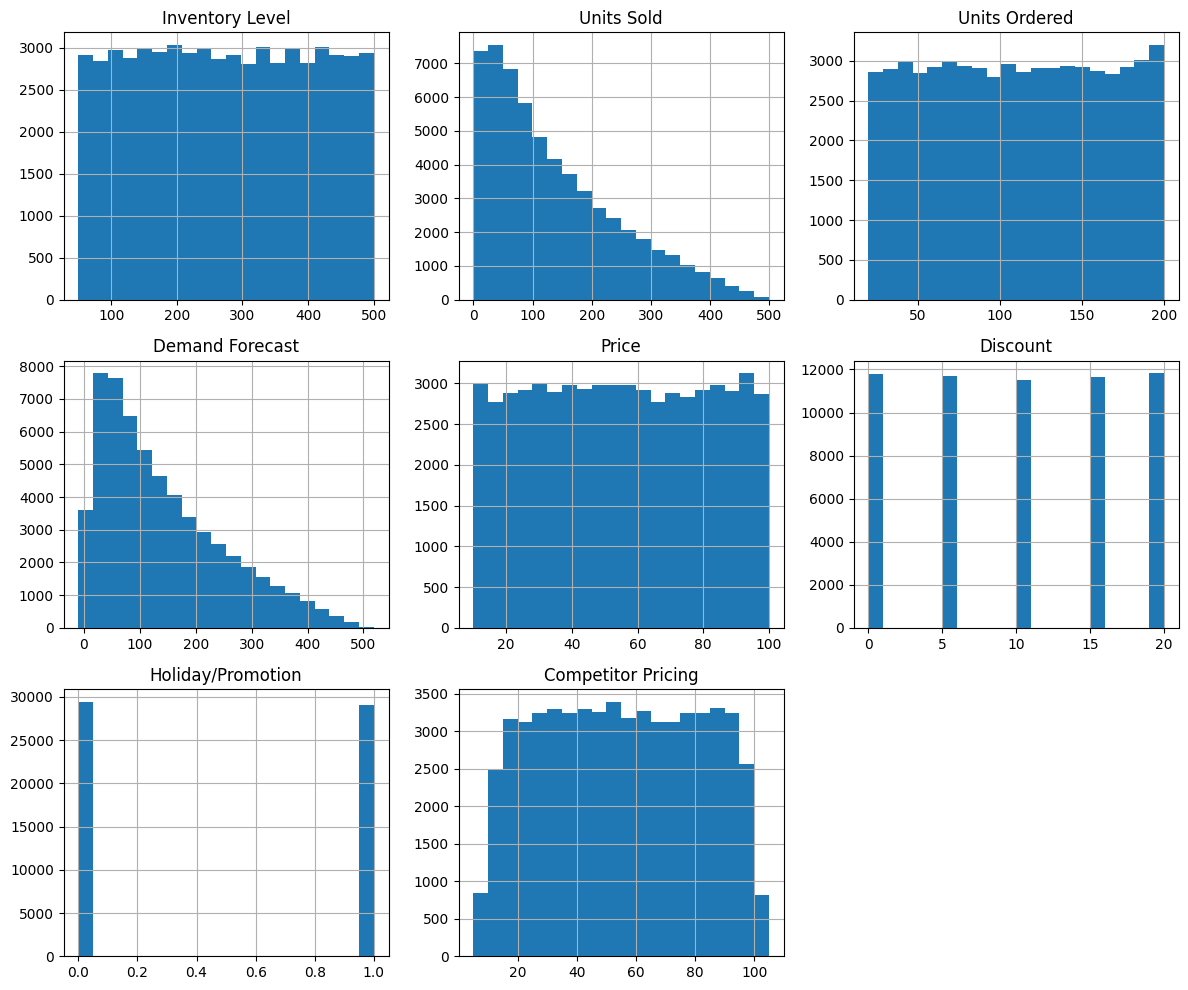

In [8]:
train_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Select only numeric columns for correlation analysis

In [9]:
numeric_cols = train_df.select_dtypes(include=['number'])

Calculate the correlation matrix

In [10]:
correlation_matrix = numeric_cols.corr()

In [11]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    Inventory Level  Units Sold  Units Ordered  \
Inventory Level            1.000000    0.590535      -0.002935   
Units Sold                 0.590535    1.000000      -0.003230   
Units Ordered             -0.002935   -0.003230       1.000000   
Demand Forecast            0.589328    0.996851      -0.003548   
Price                      0.005973    0.000001       0.003183   
Discount                   0.004802    0.003605      -0.003243   
Holiday/Promotion          0.003801   -0.000095       0.006092   
Competitor Pricing         0.005689   -0.000229       0.003810   

                    Demand Forecast     Price  Discount  Holiday/Promotion  \
Inventory Level            0.589328  0.005973  0.004802           0.003801   
Units Sold                 0.996851  0.000001  0.003605          -0.000095   
Units Ordered             -0.003548  0.003183 -0.003243           0.006092   
Demand Forecast            1.000000 -0.000718  0.003589          -0.00036

### Visualize the correlation matrix

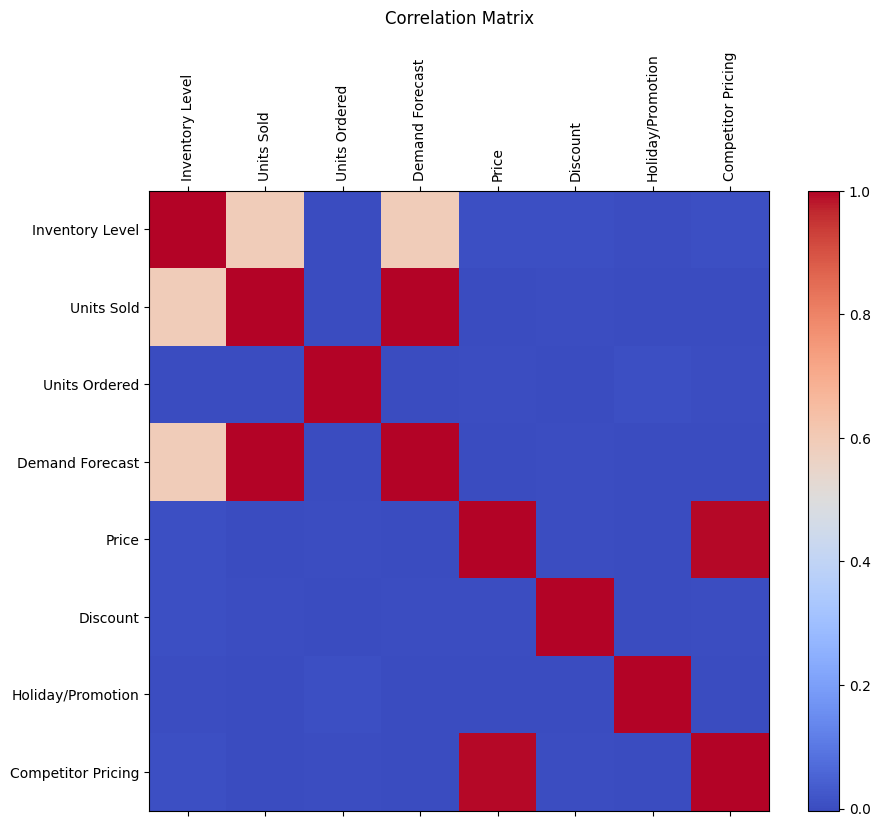

In [12]:
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.xticks(range(len(numeric_cols.columns)), numeric_cols.columns, rotation=90)
plt.yticks(range(len(numeric_cols.columns)), numeric_cols.columns)
plt.show()

The correlation matrix shows the strength and direction of linear relationships between pairs of numeric features in the dataset, with values closer to 1 or -1 indicating strong positive or negative correlations, respectively, and values near 0 indicating weak or no linear relationship.

# Data Preperation/Transformation

Define features and target

In [13]:
features = ["Price", "Store ID", "Product ID", "Inventory Level"]
target = "Units Sold"

# Split the data into features (X) and target (y)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

print("Feature and target selection successful")


Feature and target selection successful


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ["Price", "Inventory Level"]
categorical_features = ["Store ID", "Product ID"]

Define transformations

In [15]:
scaler = StandardScaler()
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")

Create a column transformer

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_features),
        ("cat", one_hot_encoder, categorical_features),
    ]
)

Apply transformations to training and testing data


In [17]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Transformed Training Data Shape:", X_train_transformed.shape)
print("Transformed Testing Data Shape:", X_test_transformed.shape)

Transformed Training Data Shape: (58480, 27)
Transformed Testing Data Shape: (14620, 27)


# Linear Regressor with Cross-Validation

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Linear Regressor
model = LinearRegression()

# Perform cross-validation on the training data
cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring="neg_mean_squared_error")

# Print cross-validation results
mean_mse = -np.mean(cv_scores)
print("Cross-Validation Mean MSE:", mean_mse)

# Train the model on the entire training set
model.fit(X_train_transformed, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test_transformed, y_test)
print("Test Set R² Score:", test_score)


Cross-Validation Mean MSE: 7733.59968033188
Test Set R² Score: 0.3449308816611043


The Test Set R² Score of 0.3449 shows that the model explains about 34.5% of the variance in the test data. This suggests that the model has moderate predictive power but leaves a significant portion of the variance unexplained.

# Training with Support Vector Regression

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize the SVR model
svr_model = SVR()

# Evaluate using cross-validation (with MSE)
svr_cv_scores = cross_val_score(svr_model, X_train_transformed, y_train, 
                                 cv=5, scoring="neg_mean_squared_error")

print("SVR Cross-Validation Mean MSE:", -svr_cv_scores.mean())

SVR Cross-Validation Mean MSE: 7813.250932014681


## Fine Tuning

In [20]:
param_grid = {
    "C": [1, 10, 100],  # Regularization parameter
    "gamma": ["scale", "auto"],  # Kernel coefficient
    "kernel": ["rbf"]  # Use Radial Basis Function kernel
}

grid_search = GridSearchCV(svr_model, param_grid, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train_transformed, y_train)

# Best parameters and model from Grid Search
best_svr_model = grid_search.best_estimator_
print("Best SVR Parameters:", grid_search.best_params_)

Best SVR Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


## Evaluate on the Test Set Using the Fine Tuned Model

In [21]:
y_pred_test = best_svr_model.predict(X_test_transformed)

# Calculate R² score for the test set
from sklearn.metrics import r2_score
test_r2_score = r2_score(y_test, y_pred_test)

print("Test Set R² Score (SVR):", test_r2_score)

Test Set R² Score (SVR): 0.34413328639866636


### The test set R² score for the SVR model (0.3441) is very close, but slightly less than the Linear Regression test set R² (0.3449)